Text(0, 0.5, 'Max Flux')

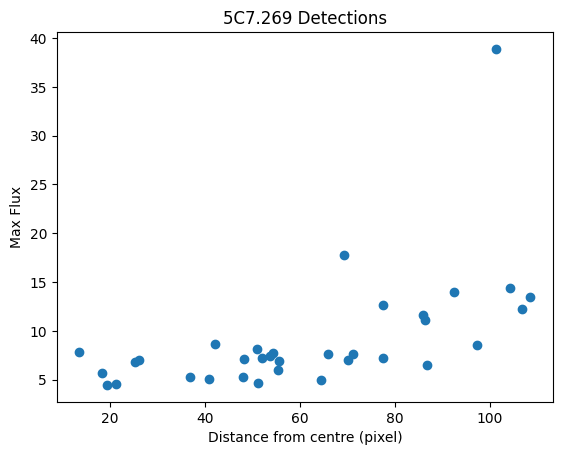

In [31]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
data = Table.read('detections.fit')
df = data.to_pandas()
df['DISTANCE'] = (((df['X_IMAGE']-100)**2) + ((df['Y_IMAGE']-100)**2))**(1/2)
plt.scatter(df['DISTANCE'], df['FLUX_MAX'])
plt.title("5C7.269 Detections")
plt.xlabel("Distance from centre (pixel)")
plt.ylabel("Max Flux")

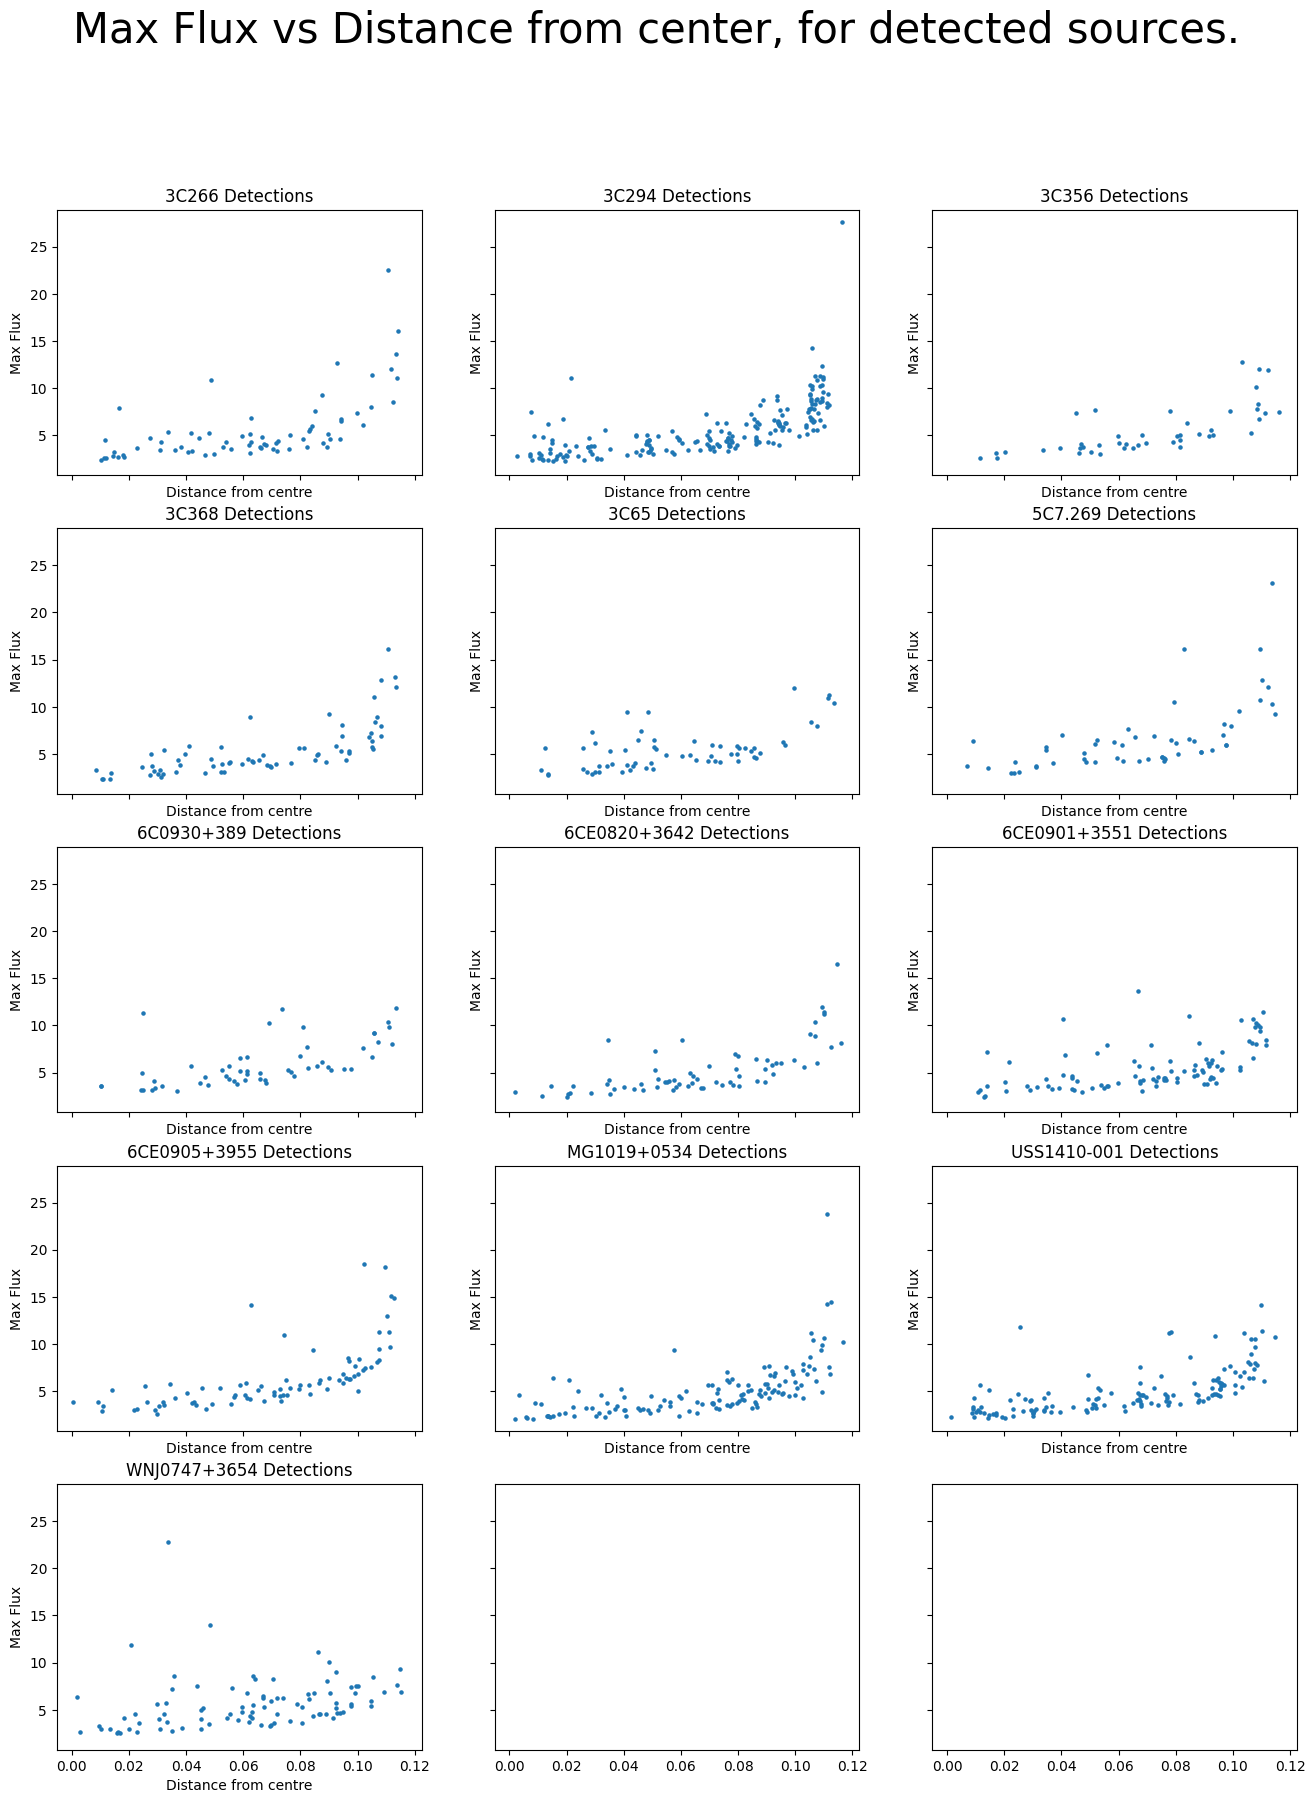

In [66]:
data = pd.read_table('source_detect/6C0930+389_sources.dat',sep='\s+',index_col='obj_id')
from astropy.coordinates import SkyCoord
import astropy.units as u

def calculation_angular_separation(ra1,dec1,center):
    c1 = SkyCoord(ra1*u.hourangle, dec1*u.deg, frame='icrs')
    sep = c1.separation(center)  # Differing frames handled correctly  
    return sep.value

center_coord = [
    SkyCoord('11h45m43s	+49d46m8.2s', frame='icrs'), #3C266
    SkyCoord('14h06m53s +34d11m21.1s', frame='icrs'), #3C294
    SkyCoord('17h24m19s	+50d57m36.2s', frame='icrs'), #3C356
    SkyCoord('18h05m06s	+11d01m33.1s', frame='icrs'), #3C368
    SkyCoord('02h23m43s	+40d00m52.7s', frame='icrs'), #3C65
    SkyCoord('08h28m39s	+25d28m27.1s', frame='icrs'), #5C7.269
    SkyCoord('09h33m07s	+38d41m50.1s', frame='icrs'), #6C0930+389
    SkyCoord('08h23m48s	+36d32m46.4s', frame='icrs'), #6CE0820+3642
    SkyCoord('09h04m32s	+35d39m04.1s', frame='icrs'), #6CE0901+3551
    SkyCoord('09h08m17s	+39d43m26.0s', frame='icrs'), #6CE0905+3955
    SkyCoord('10h19m33s	+05d34m34.8s', frame='icrs'), #MG1019+0534
    SkyCoord('14h13m15s	-00d22m59.7s', frame='icrs'), #USS1410-001
    SkyCoord('07h47m29s	+36d54m38.1s', frame='icrs'), #WNJ0747+3654
    ]
import os
filelist = os.listdir('source_detect')

figure, axis = plt.subplots(5, 3, sharex=True, sharey=True, figsize = (16,20))
figure.suptitle("Max Flux vs Distance from center, for detected sources.", fontsize=30)
axislist = axis.ravel()

for idx,val in enumerate(filelist):
    data = pd.read_table('source_detect/'+val,sep='\s+',index_col='obj_id')
    data['Angular Separation'] = data.apply(lambda x: calculation_angular_separation(x['ra'],x['dec'],center_coord[idx]), axis=1)
    axislist[idx].scatter(data['Angular Separation'], data['flux'], s=5)
    axislist[idx].set_title(val[:-12]+" Detections")
    axislist[idx].set_xlabel("Distance from centre")
    axislist[idx].set_ylabel("Max Flux")
    axislist[idx].set_yscale()

figure.savefig("plot.png")